In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [2]:
# Read data
df = pd.read_csv("data/2023_subs.csv")
df = df.groupby(["team"]).agg(
    sub_goals=("sub_goals", "sum"),
    sub_assists=("sub_assists", "sum"),
    sub_minutes=("total_minutes", "sum"),
)
df["sub_goals_per_min"] = df["sub_goals"] / df["sub_minutes"]
df["sub_assists_per_min"] = df["sub_assists"] / df["sub_minutes"]
df

,sub_goals,sub_assists,sub_minutes,sub_goals_per_min,sub_assists_per_min
team,,,,,
CHI,5,1,6237,0.000802,0.000160
HOU,1,0,6155,0.000162,0.000000
KC,6,2,6209,0.000966,0.000322
LA,6,5,6704,0.000895,0.000746
LOU,4,1,6389,0.000626,0.000157
NC,3,2,5723,0.000524,0.000349
NJY,2,3,6656,0.000300,0.000451
ORL,4,1,6260,0.000639,0.000160
POR,5,1,6728,0.000743,0.000149


<Figure size 4000x3200 with 0 Axes>

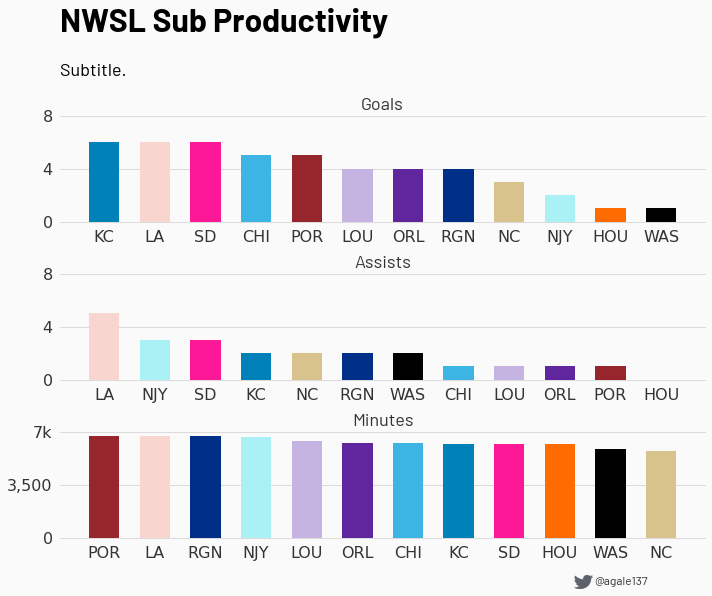

In [5]:
# Setup
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, axs = plt.subplots(4, 1, height_ratios=[1, 5, 5, 5])
fig.patch.set_facecolor(Colors.WHITE)


def plot_metric(ax, m):
    data = df.sort_values(m, ascending=False)

    # Plot data
    ax.bar(
        data.index,
        data[m],
        color=[NWSL.color(team) for team in data.index],
        width=0.6,
    )

    # Title
    ax.set_title(
        m.replace("sub_", "").capitalize(),
        fontproperties=Fonts.BARLOW,
        size=18,
        color=Colors.BLACK,
    )

    # Ticks and axes
    ax.set_facecolor(Colors.WHITE)
    ax.spines[["top", "bottom", "left", "right"]].set_visible(False)

    data_max = data[m].max()
    if data_max < 10:
        base_2 = 2 ** math.ceil(math.log2(data_max))
        base_10 = 10 ** math.ceil(math.log10(data_max))
        base = min(base_2, base_10)
    else:
        div = 10 ** math.floor(math.log10(data_max))
        base = math.ceil(data_max / div) * div
    ymax = math.ceil(data_max / base) * base
    ax.set_ylim(-0.01 * ymax, ymax)
    ax.set_yticks([0, ymax / 2, ymax])
    ax.set_yticklabels(
        ["{:,}".format(x).replace(",000", "k") for x in [0, int(ymax / 2), ymax]]
    )

    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
    ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
    ax.tick_params(bottom=False, left=False)


# Plot each metric
plot_metric(axs[1], "sub_goals")
plot_metric(axs[2], "sub_assists")
plot_metric(axs[3], "sub_minutes")

# Title
axs[0].axis("off")
axs[0].set_title(
    "NWSL Sub Productivity", fontproperties=Fonts.BARLOW_BOLD, size=32, ha="left", x=0, y=1.3
)

# Subtitle
axs[0].text(
    0,
    -0.5,
    "Subtitle.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=axs[0].transAxes,
)

# Proper spacing between subplots
fig.tight_layout()

# Twitter logo and username
add_twitter_handle(fig, x=0.8, y=-0.03, fs=12, w=0.025)

# Save image
plt.savefig(
    "images/2023_sub_efficiency.png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400
)